In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.shape

(13580, 21)

In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(6196, 21)

In [7]:
df.duplicated().sum()

0

In [8]:
y = df.Price
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [9]:
x = df.drop(['Price','Suburb','Address','SellerG','Date','CouncilArea','Regionname','Type','Method'], axis=1)
x

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0
12209,2,4.6,3181.0,2.0,1.0,1.0,0.0,61.60,2012.0,-37.85581,144.99025,4380.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
model.score(x_train,y_train)

0.9724570262149723

In [15]:
model.score(x_test,y_test)

0.7895015176359476

In [16]:
y_predict = model.predict(x_test)
y_predict

array([1631532.76, 1401098.14, 2676780.52, ..., 1432375.  ,  745070.  ,
        896125.  ])

In [17]:
x_ax = range(len(y_test))

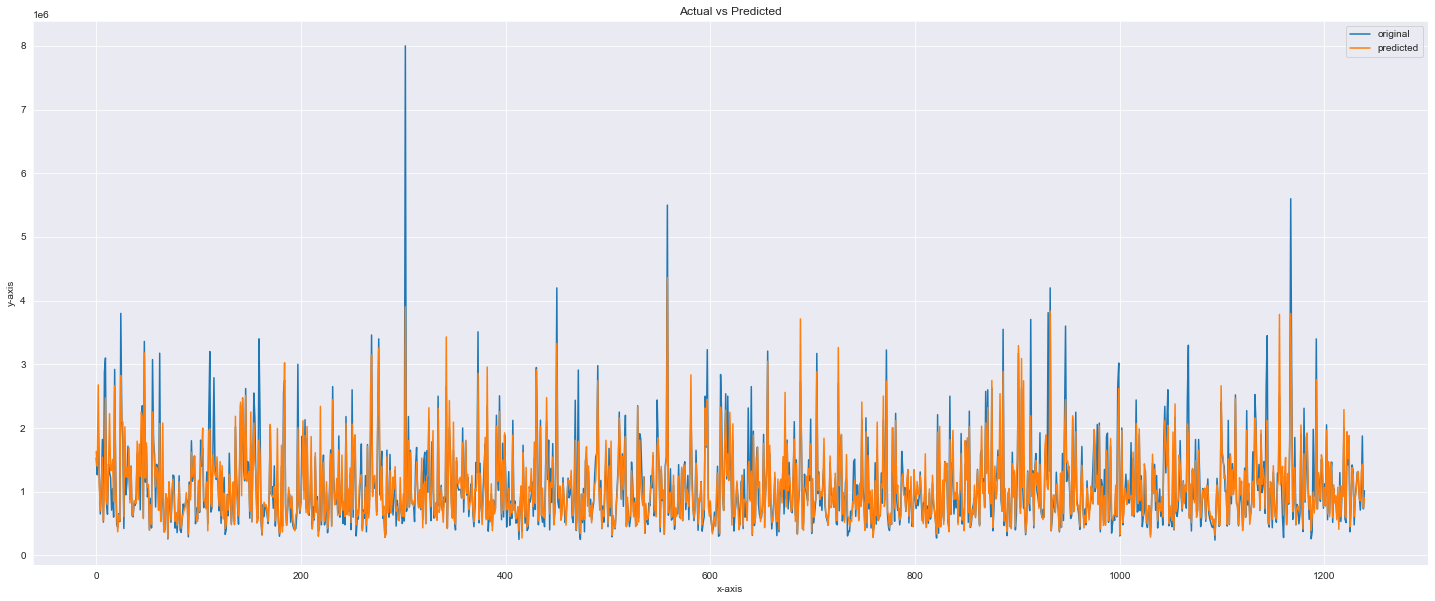

In [18]:
plt.figure(figsize=(25,10))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, y_predict, label= 'predicted')
plt.title('Actual vs Predicted')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'best', fancybox = True)

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
mse

102165188059.86348

In [20]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.6272514305823866

In [21]:
mse = mean_squared_error(y_test,y_predict)
mse

102165188059.86348